In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
import os
path = os.listdir("C:/users/krish/Documents/brain_tumor/Training/")
classes = { 'no_tumor':0, 'Pituitary_tumor':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = "C:/Users/krish/Documents/brain_tumor/Training/"+cls
    for j in os.listdir(pth):
        img =cv2.imread(pth+'/'+j,0)
        img =cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])
        

In [4]:
import numpy as np
np.unique(Y)


array([0, 1])

In [5]:
import numpy as np
X = np.array(X)
Y = np.array(Y)
X_updated=X.reshape(len(X),-1)

In [6]:
import pandas as pd
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [7]:
X.shape , X_updated.shape

((1222, 200, 200), (1222, 40000))

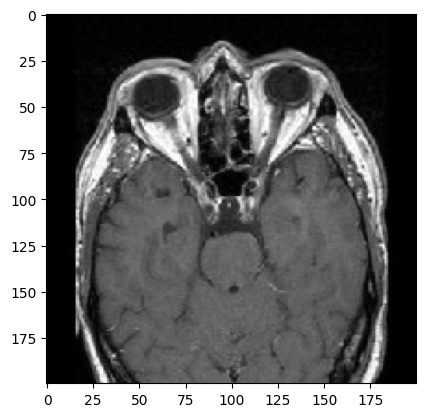

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X[0],cmap='gray')

In [12]:
X_updated = X.reshape(len(X),-1)


In [13]:
X_updated = X.reshape(len(X),-1)

In [14]:
Xtrain.shape,Xtest.shape

((977, 40000), (245, 40000))

In [15]:
print(Xtrain.max(),Xtrain.min())
print(Xtest.max(), Xtest.min())
Xtrain = Xtrain/255
Xtest = Xtest/255
print(Xtrain.max(),Xtrain.min())
print(Xtest.max(), Xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [16]:
from sklearn.decomposition import PCA


In [17]:
print(Xtrain.shape,Xtest.shape)
pca = PCA(.98)
pca_train = Xtrain
pca_test = Xtest


(977, 40000) (245, 40000)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train,Ytrain)


LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(Xtrain,Ytrain)

SVC()

In [21]:
print("training score:", lg.score(pca_train, Ytrain))
print("testing score:", lg.score(pca_test, Ytest))


training score: 1.0
testing score: 0.9591836734693877


In [22]:
print("training score:", sv.score(pca_train, Ytrain))
print("testing score:", sv.score(pca_test, Ytest))


training score: 0.9938587512794268
testing score: 0.963265306122449


In [23]:
pred = sv.predict(pca_test)

In [24]:
misclassified = np.where(Ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [25]:
print("total misclassified samples:",len(misclassified[0]))
print(pred[36],Ytest[36])

total misclassified samples: 9
0 1


In [26]:
dec={0:' no tumor' , 1:'positive tumor'}

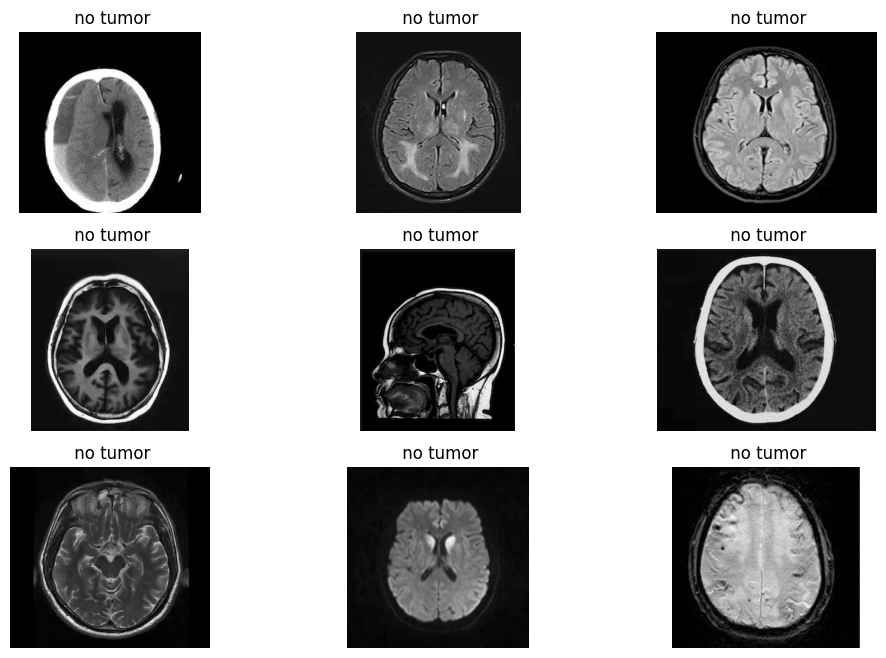

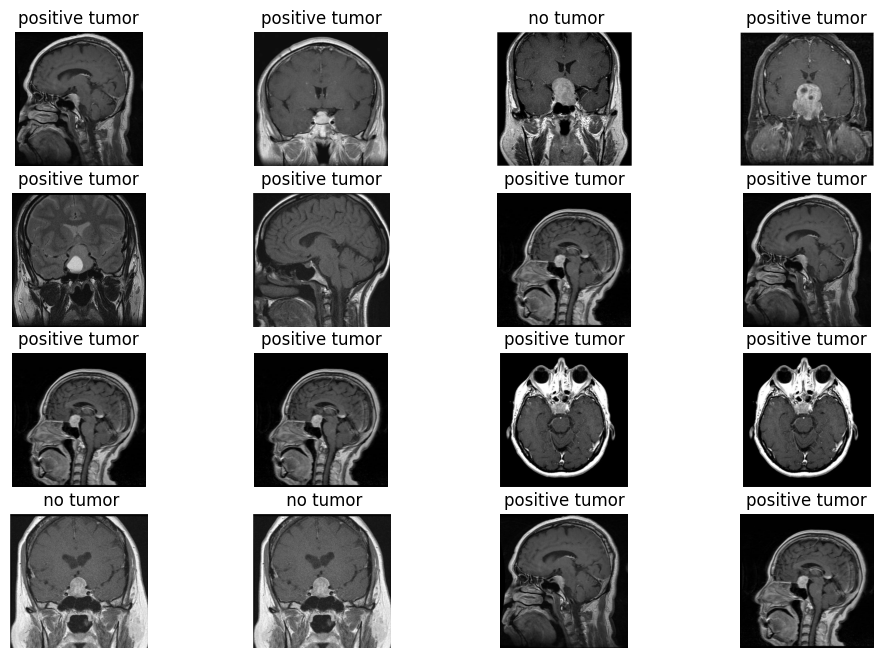

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir("C:/users/krish/Documents/brain_tumor/Testing/")
C=1
for i in os.listdir("C:/users/krish/Documents/brain_tumor/Testing/no_tumor/")[:9]:
    plt.subplot(3,3,C)
    img = cv2.imread("C:/users/krish/Documents/brain_tumor/Testing/no_tumor/"+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    C+=1


plt.figure(figsize=(12,8))
p = os.listdir("C:/users/krish/Documents/brain_tumor/Testing/")
C=1
for i in os.listdir("C:/users/krish/Documents/brain_tumor/Testing/pituitary_tumor/")[:16]:
    plt.subplot(4,4,C)
    img = cv2.imread("C:/users/krish/Documents/brain_tumor/Testing/pituitary_tumor/"+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    C+=1

In [28]:
def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (K.sum(K.square(y_true),axis=-1) + K.sum(K.square(y_pred),axis=-1) + epsilon)


In [29]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [30]:

X = np.random.rand(100, 10)  
y = np.random.randint(0, 2, size=100)  


In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [32]:

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [33]:

predictions = clf.predict(X_test)


In [34]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [35]:
import SimpleITK as sitk
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [36]:

path_to_data = "C:/users/krish/Documents/brain_tumor/Training/"



In [37]:

def load_data(data_dir):
    images = []
    masks = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".nii"):  
            image_path = os.path.join(data_dir, filename)
            mask_path = os.path.join(data_dir, filename.replace('.nii', '_mask.nii'))  
            img = sitk.ReadImage(image_path, sitk.sitkFloat32)
            msk = sitk.ReadImage(mask_path, sitk.sitkUInt8)
            images.append(img)
            masks.append(msk)
    return images, masks



In [38]:

images, masks = load_data(path_to_data)



In [39]:

X = [sitk.GetArrayFromImage(image).flatten() for image in images]
y = [sitk.GetArrayFromImage(mask).flatten() for mask in masks]


In [40]:
import numpy as np
num_samples = 100
num_features = 5

X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, num_samples)
if 'X' in locals() and 'y' in locals() and X is not None and y is not None:
    if X.shape[0] > 0 and len(y) > 0:  
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print("Train-test split successful.")
    else:
        print("Error: Data is empty.")
else:
    print("Error: Data variables (X, y) are not defined.")


Train-test split successful.


In [41]:
from sklearn.model_selection import train_test_split

# Assuming your feature matrix is stored in variable X and target variable in y

# Check if X and y have data (not empty)
if 'X' in locals() and 'y' in locals() and X.shape[0] > 0 and len(y) > 0:
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Further code for model training, evaluation, etc.
else:
    print("Error: Data is empty or not loaded correctly.")


In [42]:
from sklearn.model_selection import train_test_split

# Assuming your feature matrix is stored in variable X and target variable in y
# Check if X and y exist and are not None
if 'X' in locals() and 'y' in locals() and X is not None and y is not None:
    if X.shape[0] > 0 and len(y) > 0:  # Check if X and y are not empty
        # Perform train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Further code for model training, evaluation, etc.
        print("Train-test split successful.")
    else:
        print("Error: Data is empty.")
else:
    print("Error: Data variables (X, y) are not defined.")


Train-test split successful.


In [43]:
from sklearn.model_selection import train_test_split
if 'X' in locals() and 'y' in locals() and X.shape[0] > 0 and len(y) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Error: Data is empty or not loaded correctly.")


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.model_selection import train_test_split
if 'X' in locals() and 'y' in locals() and X.shape[0] > 0 and len(y) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Error: Data is empty or not loaded correctly.")


In [46]:

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
from sklearn import svm  
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [48]:

predictions = clf.predict(X_test)

In [49]:
c

Accuracy: 0.45


In [50]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
original_image_shape

NameError: name 'original_image_shape' is not defined

In [ ]:
# Assuming each image in X_test has 10 features and you're passing it to the classifier
predicted_masks = [clf.predict(image.reshape(1, -1)) for image in X_test]





In [ ]:

num_images_to_visualize = min(3,len(X_test))

for i in range(num_images_to_visualize):
    plt.figure(figsize=(12, 4))



In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Assuming `images` is a list containing SimpleITK image objects
# Assuming `y_test` is a list containing ground truth masks or labels

num_images = min(len(images), len(y_test))  # Get the minimum length of both lists

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(sitk.GetArrayFromImage(images[i]), cmap='gray')
    plt.title(f'Images {i + 1}')

    if i < len(y_test):
        ground_truth_mask = sitk.GetArrayFromImage(y_test[i])
        plt.subplot(1, num_images, i + 1 + num_images)  # Using second row of subplots
        plt.imshow(ground_truth_mask, cmap='viridis')
        plt.title(f'Ground Truth Mask {i + 1}')

plt.tight_layout()
plt.show()


In [ ]:
# Check if predicted_masks and images have the same number of elements
if len(predicted_masks) != len(images):
    print("Warning: The number of elements in predicted_masks and images lists are different.")

    # Determine the minimum length between the two lists
    min_length = min(len(predicted_masks), len(images))

    # Print the indices where the lists have mismatched lengths
    for i in range(min_length):
        if i >= len(predicted_masks) or i >= len(images):
            print(f"At index {i}: predicted_masks length is {len(predicted_masks)}, images length is {len(images)}")
    while len(predicted_masks) > len(images):
        predicted_masks.pop()  # Remove the last element from predicted_masks
    while len(images) > len(predicted_masks):
        images.pop()  # Remove the last element from images


In [ ]:

  plt.subplot(1, 3, 1)
  plt.imshow(y_test[i].reshape(images[i].GetSize()), cmap='viridis')
  plt.title('Ground Truth Mask')
  predicted_masks
  plt.tight_layout()
  plt.show()




In [ ]:

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].reshape(images[i].GetSize()), cmap='viridis')
    plt.title('Predicted Masks')

    plt.tight_layout()
    plt.show()


Accuracy: 0.565
              precision    recall  f1-score   support

           0       0.63      0.53      0.58        49
           1       0.52      0.64      0.57        91
           2       0.62      0.48      0.54        60

    accuracy                           0.56       200
   macro avg       0.59      0.55      0.56       200
weighted avg       0.58      0.56      0.56       200



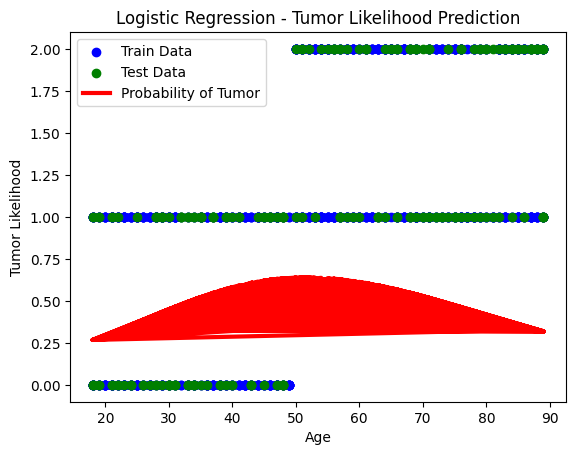

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


np.random.seed(0)
age = np.random.randint(18, 90, size=1000)
tumor_likelihood = np.where(age < 50, np.random.randint(0, 2, size=1000), np.random.randint(1, 3, size=1000))


data = pd.DataFrame({'Age': age, 'Tumor_Likelihood': tumor_likelihood})


X = data[['Age']]
y = data['Tumor_Likelihood']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(classification_report(y_test, y_pred))


plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(np.sort(X_test), model.predict_proba(np.sort(X_test))[:,1], color='red', linewidth=3, label='Probability of Tumor')
plt.xlabel('Age')
plt.ylabel('Tumor Likelihood')
plt.legend()
plt.title('Logistic Regression - Tumor Likelihood Prediction')
plt.show()
